la méthode 1 étant plus rapide, on va l'utiliser pour générer la suite

In [3]:
from time import time

def look_and_say(n):
    """Generate the look-and-say sequence up to term n.
    Returns a list of sequence members and elapsed times.
    ex : look_and_say_1(5)
    ([[1], [1, 1], [2, 1], [1, 2, 1, 1], [1, 1, 1, 2, 2, 1]], [0, 0.0, 0.0, 0.0, 0.0])
    """
    sequence = [[1]]
    elapsed = [0]
    start = time()

    for i in range(n-1):
        next_elem = []
        run_val = sequence[i][0]
        run_len = 1
        
        # loop through rest of sequence with dummy value at end
        for val in sequence[i][1:] + [-1]:
            if val != run_val:
                next_elem.extend([run_len, run_val])
                run_len = 1
                run_val = val
            else:
                run_len += 1

        sequence.append(next_elem)
        elapsed.append(time() - start)

    return sequence, elapsed

mise de la liste dans une bdd pour traitement

In [29]:
# transfert de la liste dans un fichier

n = 20
sequence, elapse  = look_and_say(n)

a = "\n"

file = open("conway.txt", 'w')
file.write(f"terme temps\n")

for i in range(n):
    b = ''.join(map(str, sequence[i]))
    file.write(f"{int(b)} {elapse[i]}{a}")
file.close()

#fichier = open("conway.txt", "r")
#print(fichier.read())
#fichier.close()

# construction de la base bdd avec le fichier txt
import pandas as pd

conway_bdd = pd.read_csv("conway.txt", sep = " ")
print(conway_bdd)
print(conway_bdd.dtypes)

                                                terme  temps
0                                                   1    0.0
1                                                  11    0.0
2                                                  21    0.0
3                                                1211    0.0
4                                              111221    0.0
5                                              312211    0.0
6                                            13112221    0.0
7                                          1113213211    0.0
8                                      31131211131221    0.0
9                                13211311123113112211    0.0
10                         11131221133112132113212221    0.0
11                 3113112221232112111312211312113211    0.0
12     1321132132111213122112311311222113111221131221    0.0
13  1113122113121113123112111311222112132113213221...    0.0
14  3113112221131112311311121321123113213221121113...    0.0
15  13211321322113311213

In [5]:
print(conway_bdd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   terme   20 non-null     object 
 1   temps   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes
None


In [30]:
print(conway_bdd['terme'])

0                                                     1
1                                                    11
2                                                    21
3                                                  1211
4                                                111221
5                                                312211
6                                              13112221
7                                            1113213211
8                                        31131211131221
9                                  13211311123113112211
10                           11131221133112132113212221
11                   3113112221232112111312211312113211
12       1321132132111213122112311311222113111221131221
13    1113122113121113123112111311222112132113213221...
14    3113112221131112311311121321123113213221121113...
15    1321132132211331121321133112111312211213211312...
16    1113122113121113222123211211131221232112311311...
17    311311222113111231133211121312211231131122

# prop 1 : les termes ne sont constitués que de 1, 2 ou 3

In [7]:
resultat = []
for terme in conway_bdd['terme']:
    if ("4" or "5" or "6" or "7" or "8" or "9") in terme :
        resultat.append(terme)
print(resultat)

[]


# prop 3 : tous les termes, sauf le 1er, sont de longueur pair

In [8]:
for terme in conway_bdd['terme']:
    if len(terme)%2 == 1:
        print(terme)

1


# prop 4 : à partir du rang 4, les termes de rang pair se terminent par 211 et ceux de rang impair par 221

In [15]:
odd_i = []
even_i = []
for i in range(3, len(conway_bdd['terme'])): 
    if i % 2: 
        even_i.append(conway_bdd['terme'][i]) 
    else : 
        odd_i.append(conway_bdd['terme'][i])
#print(even_i)
#print(odd_i)
resultat = []
for terme in even_i:
    if terme[-3:] != "211" :
        resultat.append(terme)
for terme in odd_i:
    if terme[-3:] != "221" :
        resultat.append(terme)
print(resultat)

[]


# prop 5 : les termes terminent en vélo à partir du rang 8

In [12]:
trois_n = []
trois_n_1 = []
trois_n_2 = []
for i in range(7, len(conway_bdd['terme'])): 
    if i % 3 == 0:
        trois_n.append(conway_bdd['terme'][i])
    elif i % 3  == 1:
        trois_n_1.append(conway_bdd['terme'][i])
    else :
        trois_n_2.append(conway_bdd['terme'][i])
#print(trois_n)
#print(trois_n_1)
#print(trois_n_2)

resultat = []
for terme in trois_n:
    if terme[:4] != "1321" :
        resultat.append(terme)
for terme in trois_n_1:
    if terme[:4] != "1113" :
        resultat.append(terme)
for terme in trois_n_2:
    if terme[:4] != "3113" :
        resultat.append(terme)
        
print(resultat)

[]


# prop 7 : proportion de 1, 2 et 3 dans les termes semblent se stabiliser

In [17]:
props = [[0 for _2 in range(n)] for _1 in range(3)]
for i, seq in enumerate(sequence):
    # count first
    for elem in seq:
        props[elem - 1][i] += 1
    # then normalise
    for j in range(3):
        props[j][i] /= len(seq)

In [18]:
indicies = [i + 1 for i in range(n)]

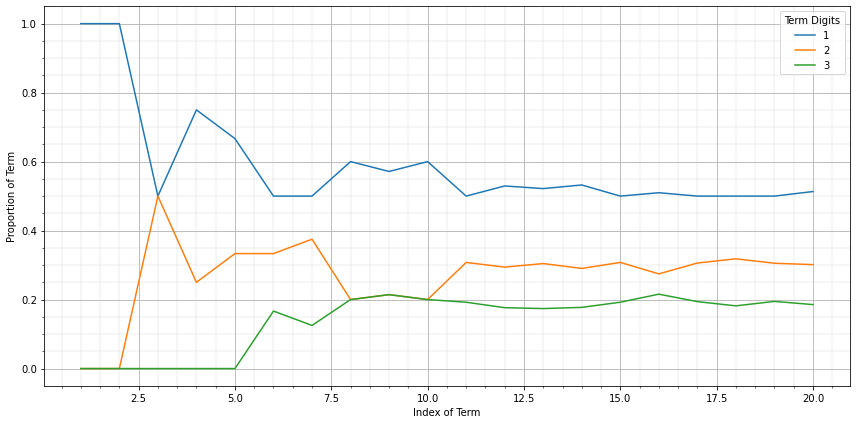

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(3):
    ax.plot(indicies, props[i], label=f'{i+1}')
ax.legend(title="Term Digits")
ax.set_xlabel('Index of Term')
ax.set_ylabel('Proportion of Term');
ax.grid()
ax.minorticks_on()
ax.grid(which='minor', linestyle='-', linewidth=.2)

fig.patch.set_facecolor('white')
fig.tight_layout();

# prop 2 : 92 briques (à faire - non fait actuellement)

In [1]:
import pandas as pd

elt_bdd = pd.read_csv("element.txt", sep = "\t")
print(elt_bdd)
print(elt_bdd.dtypes)

   Element      Evolution                                      String  \
1        H              H                                          22   
2       He  Hf Pa H Ca Li            13112221133211322112211213322112   
3       Li             He                 312211322212221121123222112   
4       Be       Ge Ca Li  111312211312113221133211322112211213322112   
5        B             Be          1321132122211322212221121123222112   
..     ...            ...                                         ...   
88      Ra             Fr                                      132113   
89      Ac             Ra                                        3113   
90      Th             Ac                                        1113   
91      Pa             Th                                          13   
92       U             Pa                                           3   

                                     String Evolution  
1                                                  22  
2          

In [2]:
del elt_bdd['Element']
del elt_bdd['Evolution']
elt_bdd

,String,String Evolution
1,22,22
2,13112221133211322112211213322112,11132132212312211322212221121123222112
3,312211322212221121123222112,13112221133211322112211213322112
4,111312211312113221133211322112211213322112,3113112221131112211322212312211322212221121123...
5,1321132122211322212221121123222112,111312211312113221133211322112211213322112
...,...,...
88,132113,1113122113
89,3113,132113
90,1113,3113
91,13,1113
